## Setup and Extract data

In [4]:
import os
import numpy as np
import pandas
import matplotlib.pyplot as plt
from scipy.spatial.transform import Rotation as R
import scipy.stats as stats
import math


In [5]:
cwd = os.getcwd()
imu_df = pandas.read_csv(cwd+'/imu_part1.csv')
mag_df = pandas.read_csv(cwd+'/mag_part1.csv')

In [6]:
mag_time = np.array(list(mag_df['%time']))
mag_time = (mag_time - mag_time[0])/(10**9)
mag_x = list(mag_df['field.magnetic_field.x'])
mag_y = list(mag_df['field.magnetic_field.y'])
mag_z = list(mag_df['field.magnetic_field.z'])

imu_time = np.array(list(imu_df['%time']))
imu_time = (imu_time - imu_time[0])/(10**9)
quat = np.array([imu_df['field.orientation.x'], 
                 imu_df['field.orientation.y'],
                 imu_df['field.orientation.z'],
                 imu_df['field.orientation.w']])

quat = np.transpose(quat)
r = R.from_quat(quat)
RPY = r.as_euler('xyz', degrees=True)
RPY = np.transpose(RPY)

ang_vel = [imu_df['field.angular_velocity.x'],
           imu_df['field.angular_velocity.y'],
           imu_df['field.angular_velocity.z']]

lin_accel = [imu_df['field.linear_acceleration.x'],
             imu_df['field.linear_acceleration.y'],
             imu_df['field.linear_acceleration.z']]

## Plot Function

In [44]:
def plot_time_series(fig_n, data, time, title, unit):
    fig = plt.figure(fig_n, figsize = (20,10))
    ax = fig.add_subplot(121)
    ax.plot(time,data)
    ax.set_title(title, fontsize = 20)
    ax.set_xlabel('Time (s)', fontsize = 15)
    ax.set_ylabel(title + '({})'.format(unit), fontsize = 15)
    
    mean = np.mean(data)
    noise = np.array(data) - mean
    mu = np.mean(noise)
    var = np.var(noise)
    sigma = math.sqrt(var)
    num_bins = 50
    x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
    
    ax = fig.add_subplot(122)
    ax.hist(noise, num_bins, density=True)
    ax.plot(x, stats.norm.pdf(x, mu, sigma), label = 'Normal Fit')
    ax.set_title(title+' noise characteristics', fontsize = 20)
    ax.set_xlabel(title + '({})'.format(unit),fontsize = 15)
    ax.set_ylabel('density', fontsize = 15)
    ax.legend(fontsize = 15)
    
    print(title + ' Noise Stats')
    print('mu: {:.3e}'.format(mu))
    print('var: {:.3e}\n'.format(var))
    return fig
    

Angular Velocity X Noise Stats
mu: -4.570e-21
var: 3.918e-07

Angular Velocity Y Noise Stats
mu: -1.942e-20
var: 1.177e-06

Angular Velocity Z Noise Stats
mu: 2.171e-20
var: 7.300e-07

Linear Acceleration X Noise Stats
mu: 1.866e-17
var: 1.544e-04

Linear Acceleration Y Noise Stats
mu: 5.965e-18
var: 1.533e-04

Linear Acceleration Z Noise Stats
mu: 1.861e-15
var: 3.781e-04

Roll Noise Stats
mu: 3.802e-18
var: 2.035e-05

Pitch Noise Stats
mu: -1.616e-17
var: 2.722e-05

Yaw Noise Stats
mu: 1.997e-16
var: 1.864e+01

Magnetic Field X Noise Stats
mu: -9.627e-18
var: 6.848e-06

Magnetic Field Y Noise Stats
mu: 1.128e-17
var: 4.494e-05

Magnetic Field Z Noise Stats
mu: -3.541e-17
var: 3.944e-05



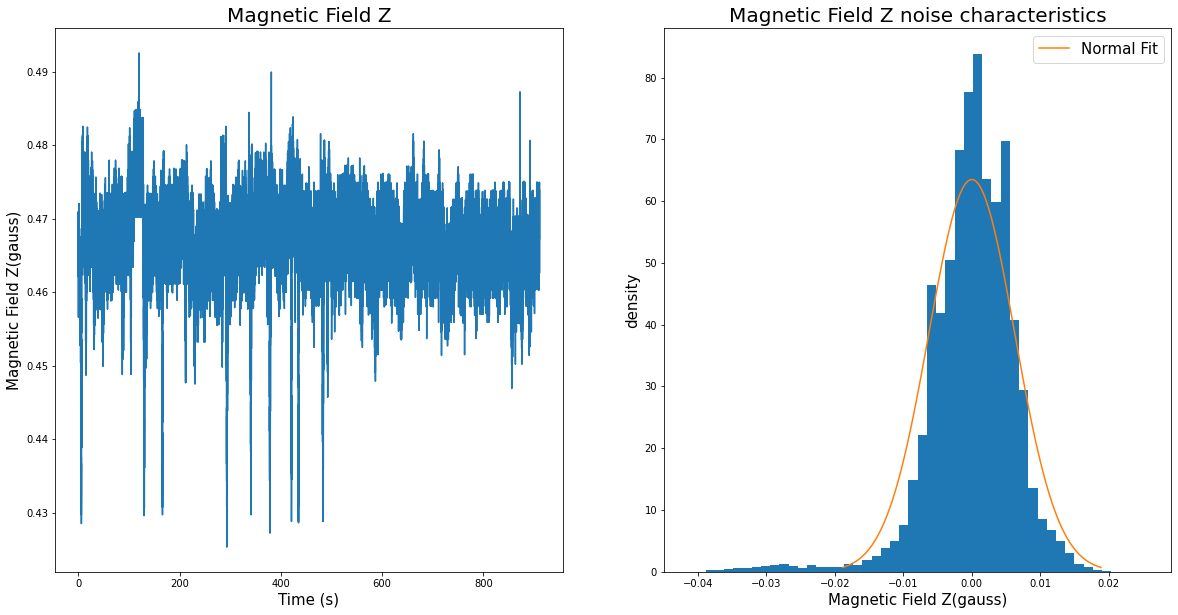

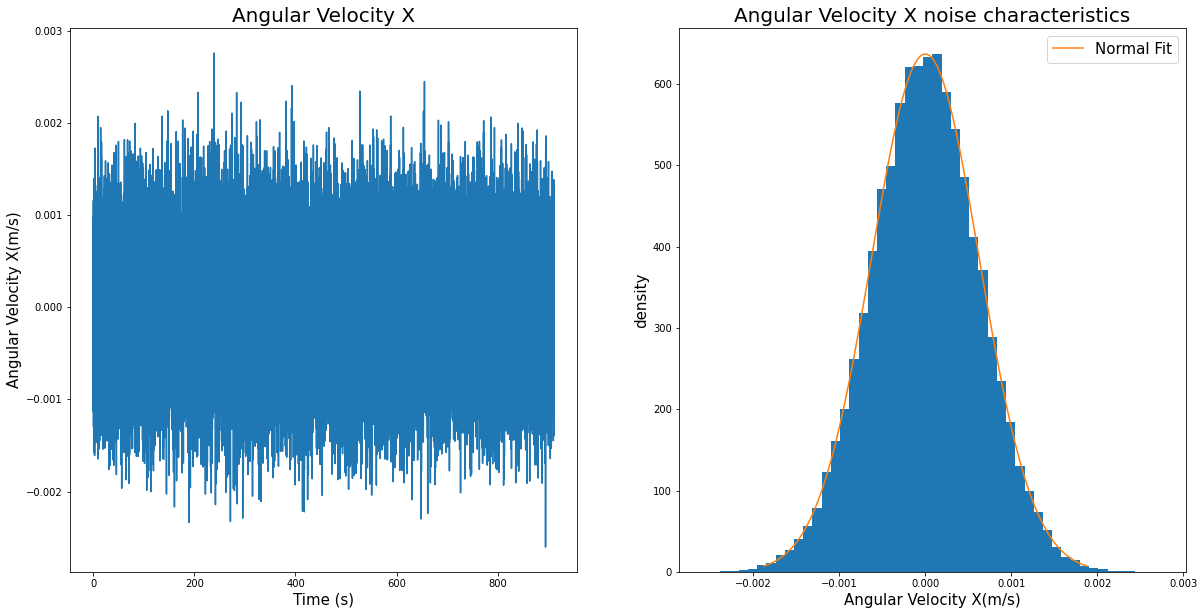

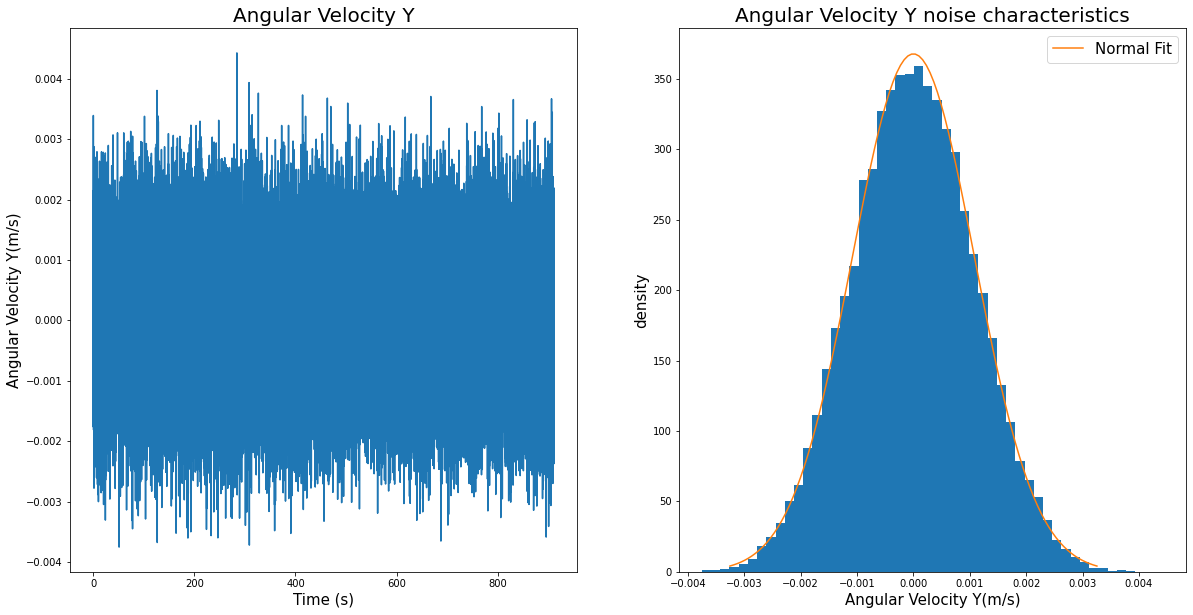

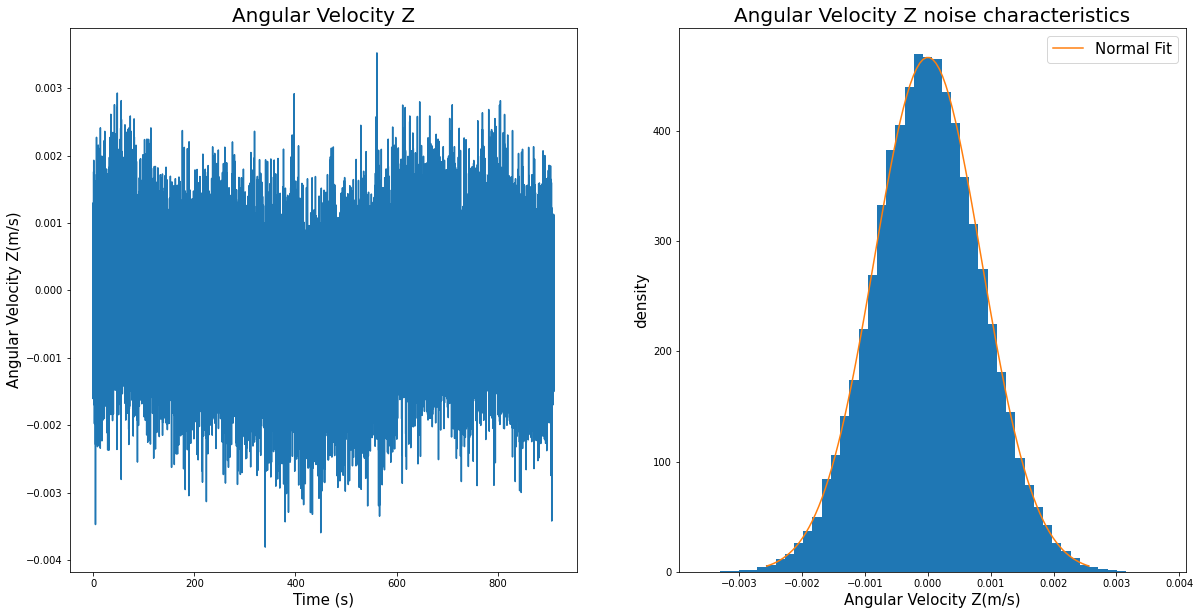

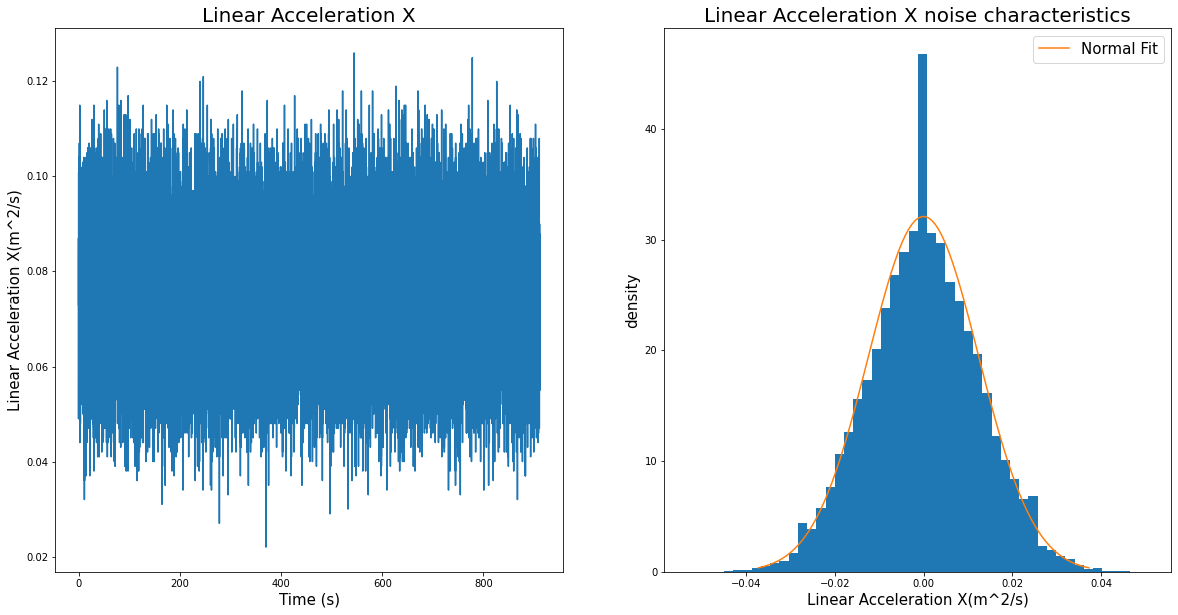

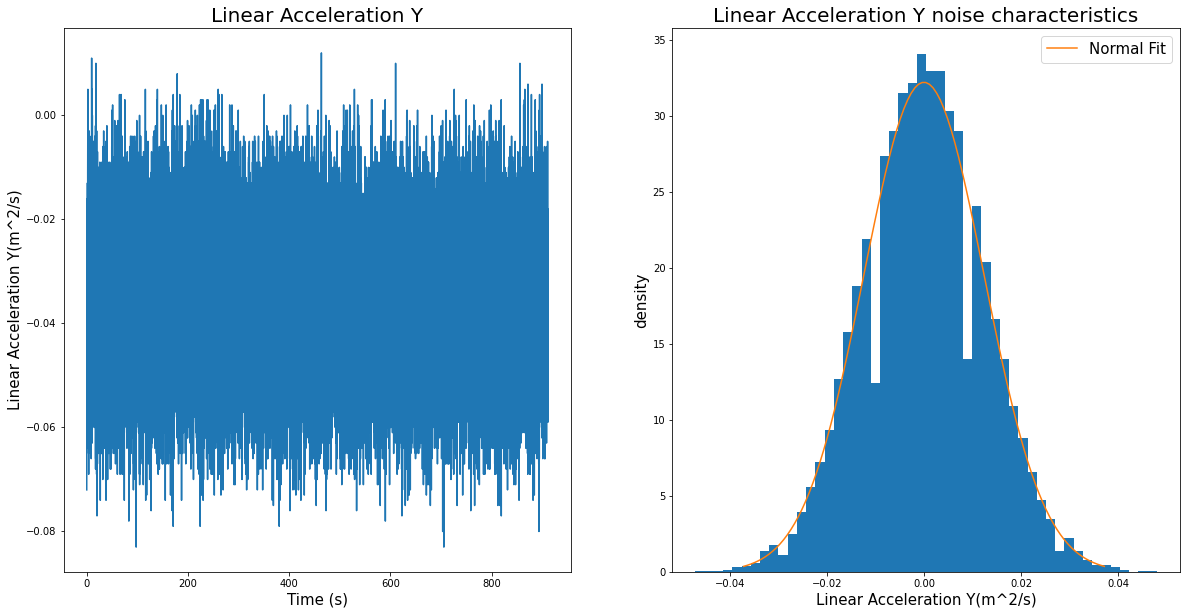

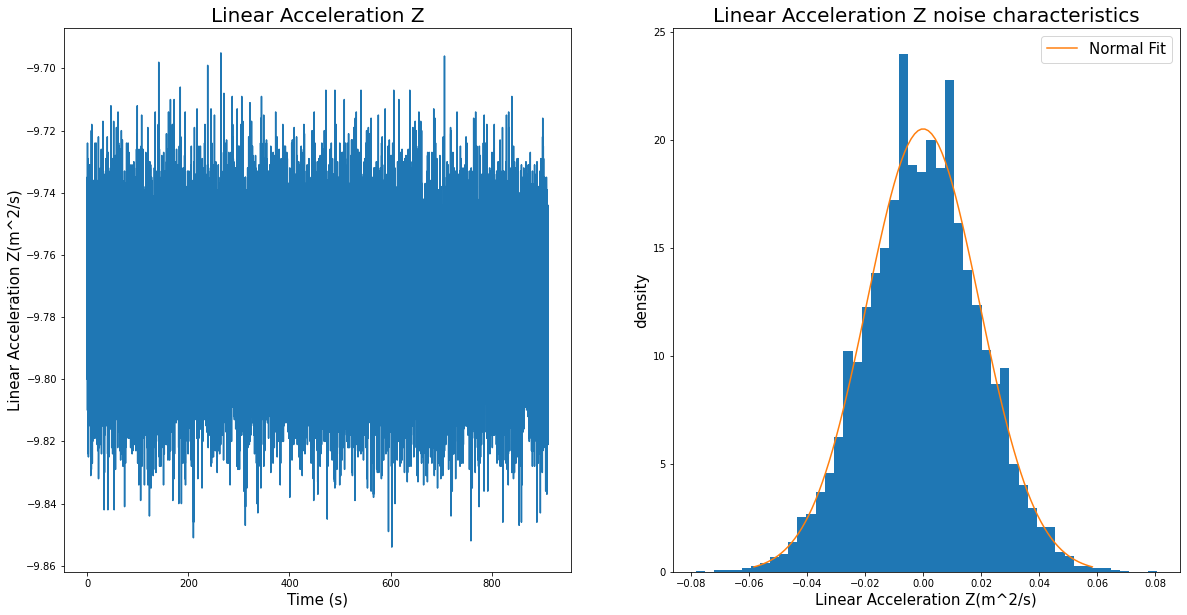

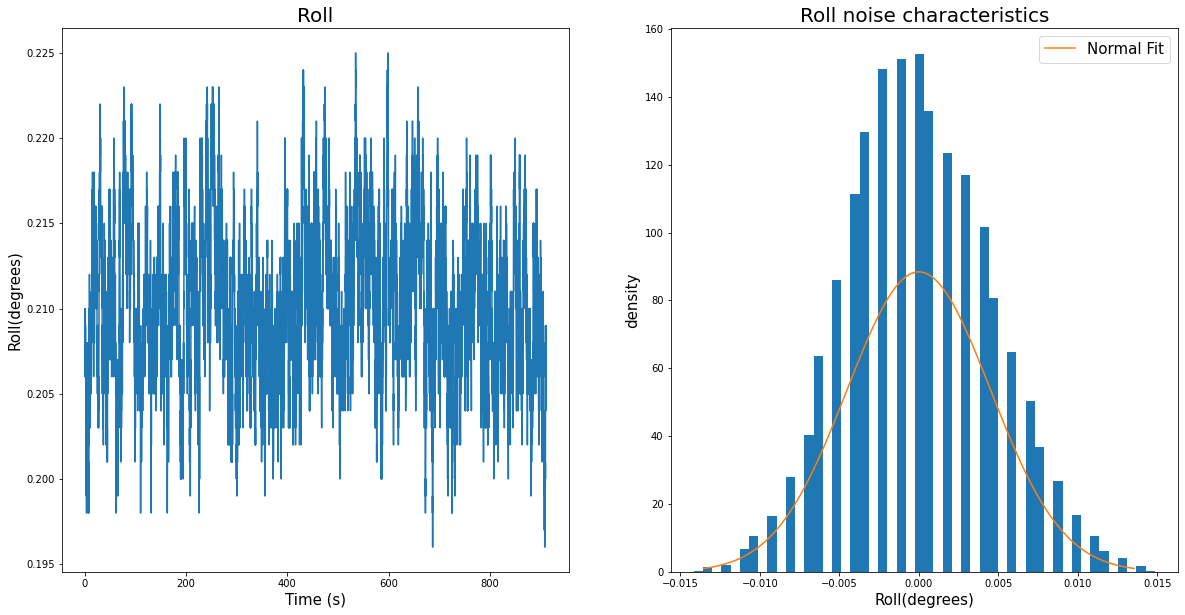

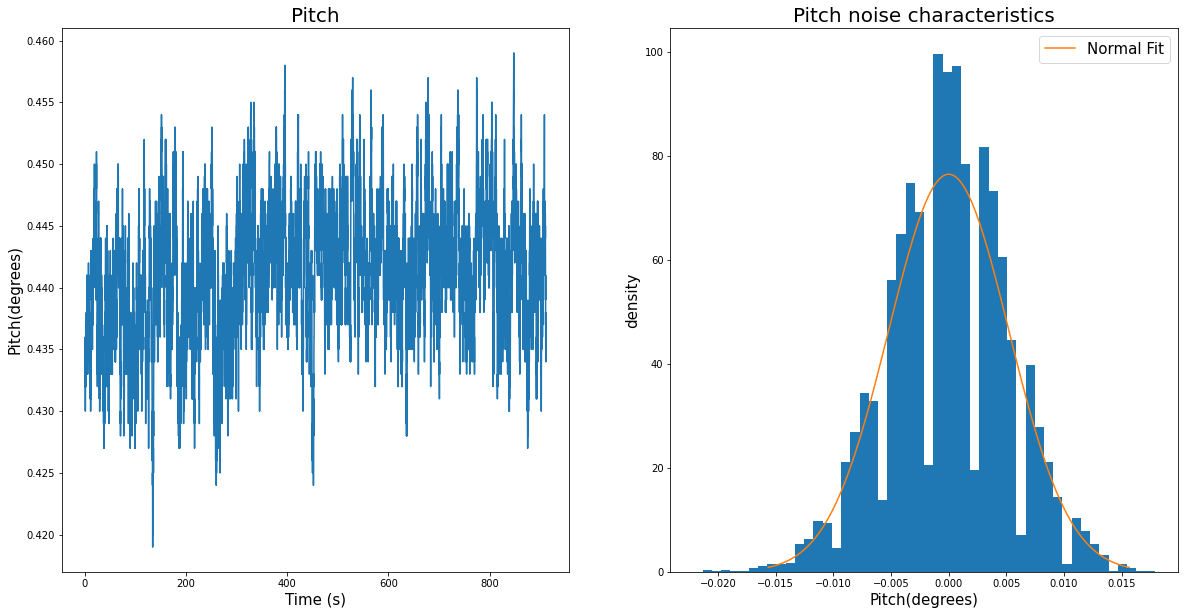

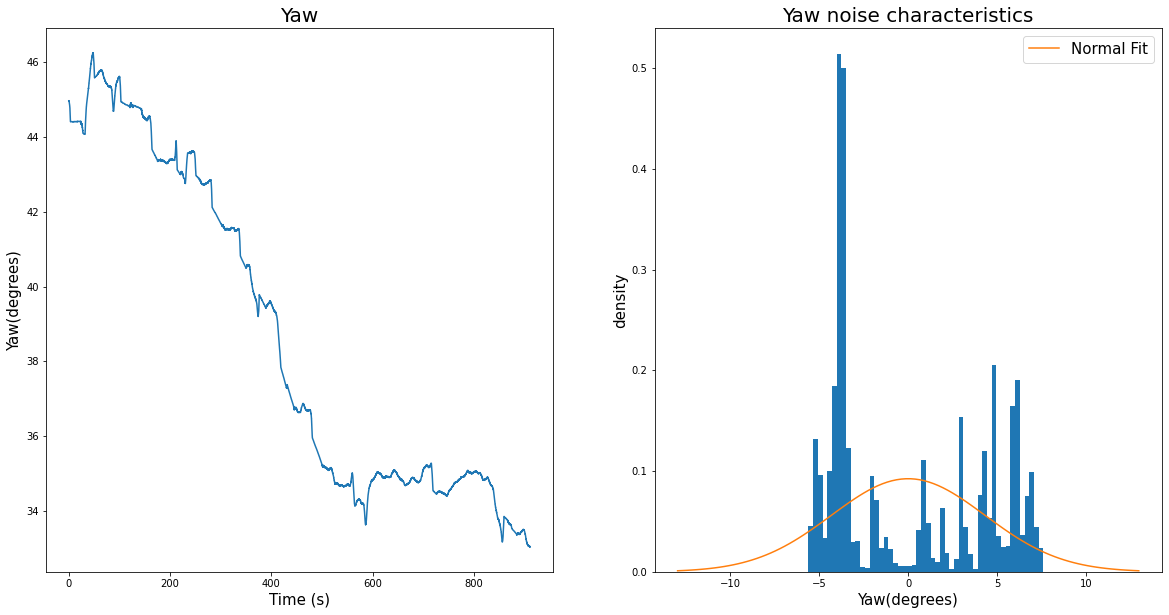

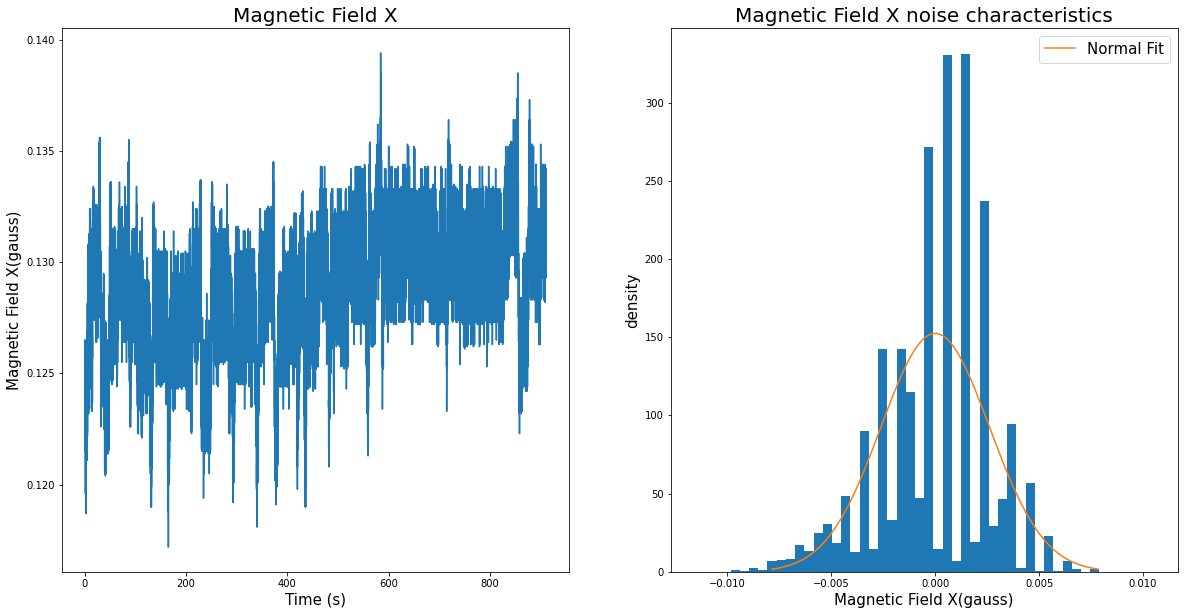

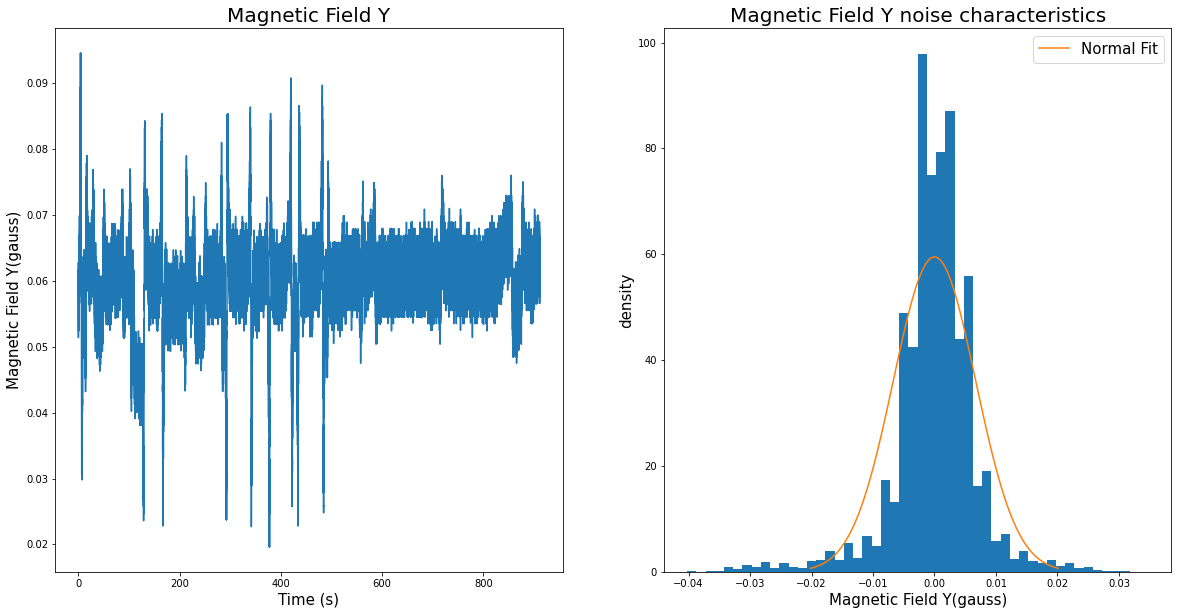

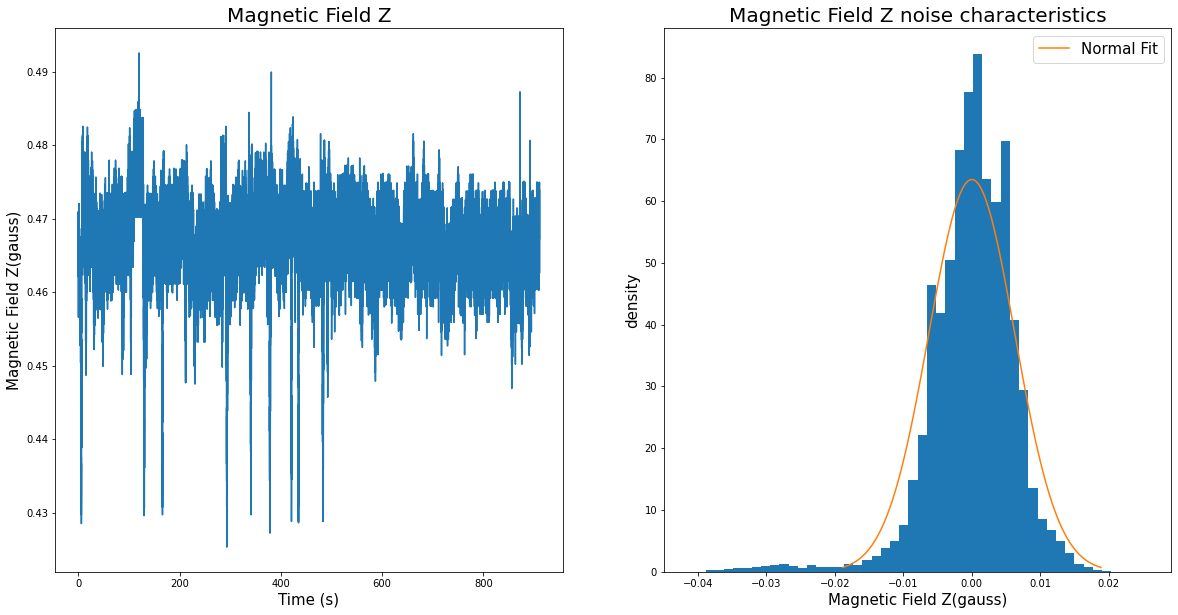

In [46]:
plot_time_series(1, ang_vel[0], imu_time, 'Angular Velocity X', 'm/s')
plot_time_series(2, ang_vel[1], imu_time, 'Angular Velocity Y', 'm/s')
plot_time_series(3, ang_vel[2], imu_time, 'Angular Velocity Z', 'm/s')
plot_time_series(4, lin_accel[0], imu_time, 'Linear Acceleration X', 'm^2/s')
plot_time_series(5, lin_accel[1], imu_time, 'Linear Acceleration Y', 'm^2/s')
plot_time_series(6, lin_accel[2], imu_time, 'Linear Acceleration Z', 'm^2/s')
plot_time_series(7, RPY[0], imu_time, 'Roll', 'degrees')
plot_time_series(8, RPY[1], imu_time, 'Pitch', 'degrees')
plot_time_series(9, RPY[2], imu_time, 'Yaw', 'degrees')
plot_time_series(10, mag_x, mag_time, 'Magnetic Field X', 'gauss')
plot_time_series(11, mag_y, mag_time, 'Magnetic Field Y', 'gauss')
plot_time_series(12, mag_z, mag_time, 'Magnetic Field Z', 'gauss')